In [0]:
base_dir = 'drive/ell409/src'

import os
os.chdir(base_dir)

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import data_util as du
import performance_util as pu
import bayes_classifier as bayes
import knn_classifier as knn

from sklearn.decomposition import PCA
# from PCA import PCA
import kmeans

%matplotlib inline

In [0]:
data_dir = '../data/fashion_mnist/'
random_seed = 1
np.set_printoptions(precision=4)

In [17]:
X_train, Y_train = du.load_fashion_mnist(data_dir + 'train')
X_test, Y_test = du.load_fashion_mnist(data_dir + 't10k')

X_train = du.normalize2(X_train)
X_test = du.normalize2(X_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [0]:
# Visualization of One Image

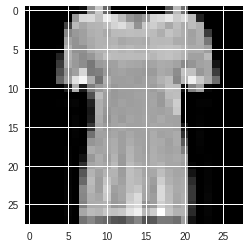

In [19]:
plt.imshow(np.reshape(X_train[10], (-1, 28)))
plt.gray()

In [0]:
# PCA (n_components = 25)

(60000, 25)
(10000, 25)
0.7204558133834784


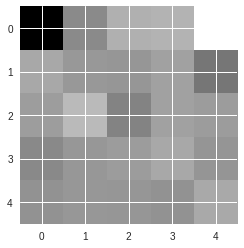

In [21]:
pca = PCA(n_components=25)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

# Print reduced image
plt.imshow(np.reshape(X_train_reduced_1[10], (-1, 5)))
plt.gray()

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)
print(np.sum(pca.explained_variance_ratio_))

In [0]:
# Supervised Learning

## Bayes Classifier

### Training and Parameter Tuning

#### Class Conditional Distribution - (GMM - components = 1)

In [23]:
parameters = [4, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

Class 0
Didn't converge, ran for 10 iterations
Class 1
Didn't converge, ran for 10 iterations
Class 2
Didn't converge, ran for 10 iterations
Class 3
Didn't converge, ran for 10 iterations
Class 4
Didn't converge, ran for 10 iterations
Class 5
Didn't converge, ran for 10 iterations
Class 6
Didn't converge, ran for 10 iterations
Class 7
Didn't converge, ran for 10 iterations
Class 8
Didn't converge, ran for 10 iterations
Class 9
Didn't converge, ran for 10 iterations


In [24]:
### Testing

Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

Accuracy on Test Set =  0.8319
Precision per Class
[0.7473 0.9698 0.6958 0.8134 0.6777 0.9463 0.6442 0.9009 0.9585 0.9484]
Recall per Class
[0.822 0.963 0.764 0.85  0.778 0.934 0.411 0.936 0.923 0.938]
F1 Score per Class
[0.7829 0.9664 0.7283 0.8313 0.7244 0.9401 0.5018 0.9181 0.9404 0.9432]
Macro Average Precision, Recall and F1 Score
[0.8302 0.8319 0.8311]
Micro Average Precision, Recall and F1 Score
[0.8319 0.8319 0.8319]


